In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
SD = 0.3
Denom = SD**2*2
A = 1/np.sqrt(2*np.pi*SD)
print(Denom, A)

0.18 0.7283656203947194


In [3]:
def gaussian(mean, std, x):
    return (1/(std*np.sqrt(2*np.pi))) * np.exp(-1/2 * ((x - mean)/std)**2)

In [4]:
def ran_gen():
    eigen_arr =[]
    for i in range(100):
        eigenval = random.uniform(-6.0, 6.0)
        eigen_arr.append(eigenval)
    return eigen_arr

In [5]:
eigen_arr = ran_gen()

In [6]:
eigentensor = torch.FloatTensor(eigen_arr)

In [7]:
eigentensor.shape

torch.Size([100])

In [8]:
eigenvalues = eigentensor.reshape(100,1)
eigenvalues.shape

torch.Size([100, 1])

In [9]:
torch.manual_seed(1)   
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  
z = x - eigenvalues
y =  A*torch.exp(-z.pow(2)/Denom, out=None)  

In [10]:
y.shape

torch.Size([100, 1])

In [11]:
def MAE(y,y_hat,epoch):
    res = 0
    for i in range(len(y)):
        res += abs(y[i] - y_hat[i])
    return res/len(y)

In [12]:
class Model(nn.Module):
        def __init__(self, n_feature, n_hidden, n_output):
            super(Model, self).__init__()
            self.hidden = torch.nn.Linear(n_feature, n_hidden)   
            self.predict = torch.nn.Linear(n_hidden, n_output)   

        def forward(self, x):
            #x = F.relu(self.hidden(x))
            x = F.elu(self.hidden(x))      
            x = self.predict(x)             
            return x

mod = Model(n_feature=1, n_hidden=10, n_output=1)

#We can experiment with Stochastic Gradient Descent or Adam depending on preference
optimizer = torch.optim.SGD(mod.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()     


EPOCHS = 1000
arr_loss = []
arr_mae = []
for i in range(1,EPOCHS+1):
    prediction = mod(eigenvalues)      
    loss = loss_func(prediction, y)     
    optimizer.zero_grad()    
    loss.backward(retain_graph=True)          
    optimizer.step()        
    arr_loss.append(loss.data.numpy())
    arr_mae.append(MAE(y.data,prediction.data,i).numpy())
    #print('Epoch: ', i, 'Loss = %.8f' % loss.data.numpy(),
    #     'MAE: ', MAE(y.data,prediction.data,i).numpy())

Text(0.5, 1.0, 'Loss Vs Epochs')

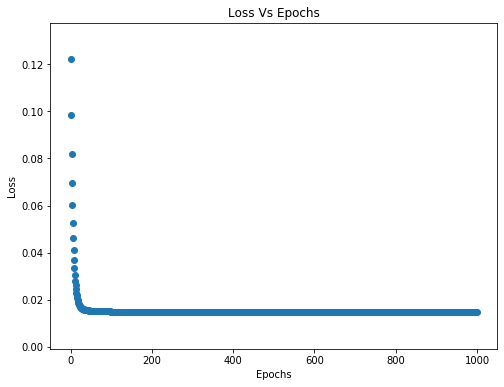

In [13]:
e = np.linspace(0,len(arr_loss) - 1, len(arr_loss))
plt.figure(figsize=(8,6))
plt.scatter(e, np.array(arr_loss))
#plt.scatter(r)
#plt.scatter(e, np.array(arr_mae), color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Vs Epochs')

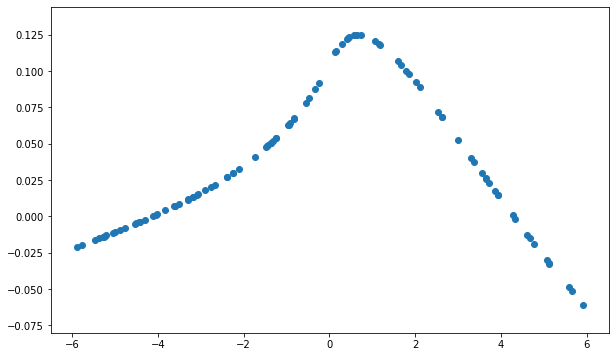

In [14]:
plt.figure(figsize = (10,6))
plt.scatter(eigenvalues.data.numpy(), prediction.data.numpy())

In [15]:
from sklearn.model_selection import train_test_split
eigen_train, eigen_test = train_test_split(list(range(len(eigenvalues))), test_size=0.5)

In [16]:
#128
len(eigen_train), len(eigen_test)

(50, 50)

In [17]:
training_eigenvalues = torch.FloatTensor(eigen_train)
testing_eigenvalues = torch.FloatTensor(eigen_test)
len(training_eigenvalues)

50

In [18]:
train, test = train_test_split(list(range(len(y))), test_size=0.5)
y_train = torch.FloatTensor(train)
y_test = torch.FloatTensor(test)

In [19]:
y_test.shape

torch.Size([50])

In [20]:
y_test = Variable(y_test)
#testing_eigenvalues = Variable(eigen_test)

y_train = Variable(y_train)
#training_eigenvalues = Variable(y_train)

In [21]:
class Model(nn.Module):
        def __init__(self, n_feature, n_hidden, n_output):
            super(Model, self).__init__()
            self.hidden = torch.nn.Linear(n_feature, n_hidden)   
            self.predict = torch.nn.Linear(n_hidden, n_output)   

        def forward(self, x):
            #x = F.relu(self.hidden(x))
            x = F.elu(self.hidden(x))      
            x = self.predict(x)             
            return x

mod = Model(n_feature=1, n_hidden=10, n_output=1)

#We can experiment with Stochastic Gradient Descent or Adam depending on preference
optimizer = torch.optim.SGD(mod.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss() 
model = Model(n_feature=1, n_hidden=10, n_output=1)
    #We can experiment with Stochastic Gradient Descent or Adam depending on preference
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


loss_func = torch.nn.MSELoss()   


EPOCHS = 1000
arr_loss = []
arr_mae = []
Train_Loss= []
Test_Loss = []
for i in range(1,EPOCHS+1):
    
    
    for k in range(len(training_eigenvalues)):
        
        training_loss = []
        y_pred =   model(training_eigenvalues.reshape(50,1))      
        #prediction.train()
        #validation_loss = 
        train_loss = loss_func(y_pred,y_train)
        
    

        optimizer.zero_grad()    
        train_loss.backward()          
        optimizer.step()        
        training_loss.append(train_loss.data)
    #arr_mae.append(MAE(y.data,prediction.data,i).numpy())
         
    Train_Loss += training_loss
    running_loss = Train_Loss[i-1]/i
    print('Training_Loss', running_loss)

/home/david/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Training_Loss tensor(2643.6777)
Training_Loss tensor(430.1750)
Training_Loss tensor(286.7833)
Training_Loss tensor(215.0875)
Training_Loss tensor(172.0700)
Training_Loss tensor(143.3917)
Training_Loss tensor(122.9071)
Training_Loss tensor(107.5437)
Training_Loss tensor(95.5944)
Training_Loss tensor(86.0350)
Training_Loss tensor(78.2136)
Training_Loss tensor(71.6958)
Training_Loss tensor(66.1808)
Training_Loss tensor(61.4536)
Training_Loss tensor(57.3567)
Training_Loss tensor(53.7719)
Training_Loss tensor(50.6088)
Training_Loss tensor(47.7972)
Training_Loss tensor(45.2816)
Training_Loss tensor(43.0175)
Training_Loss tensor(40.9690)
Training_Loss tensor(39.1068)
Training_Loss tensor(37.4065)
Training_Loss tensor(35.8479)
Training_Loss tensor(34.4140)
Training_Loss tensor(33.0904)
Training_Loss tensor(31.8648)
Training_Loss tensor(30.7268)
Training_Loss tensor(29.6672)
Training_Loss tensor(28.6783)
Training_Loss tensor(27.7532)
Training_Loss tensor(26.8859)
Training_Loss tensor(26.0712)
T

In [22]:
prediction[79]

tensor([-0.0094], grad_fn=<SelectBackward>)

In [23]:
for i in range(1,EPOCHS+1):    
    
    for k in range(len(testing_eigenvalues)):
        validation_loss = []
        preds = model(testing_eigenvalues.reshape(50,1))
        #validation_loss = []
        #with torch.no_grad():
        test_loss = loss_func(preds,y_test)
        optimizer.zero_grad()    
        test_loss.backward()         
        optimizer.step()
    validation_loss.append(test_loss.data.numpy())
    
    Test_Loss += (validation_loss)
    running_tes = Test_Loss[i-1]/i
    #print(Test_Loss[i-1]/i)
    #print('Epoch: ', i, 'Loss = %.4f' % train_loss.mean(),
    #     'MAE: ', MAE(y.data,prediction.data,i).numpy())

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


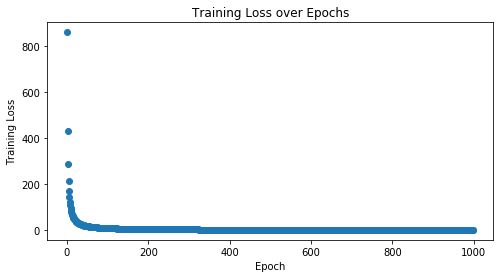

In [24]:
e = np.linspace(0,len(Train_Loss) - 1, len(Train_Loss))
plt.figure(figsize=(8,4)) 
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.scatter(e, np.array(Train_Loss)/e)

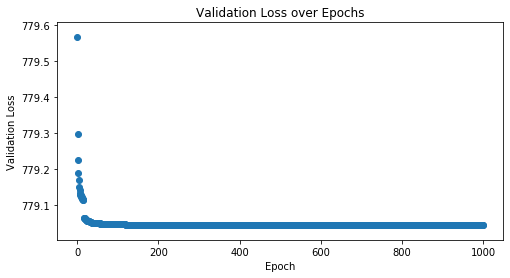

In [25]:
f = np.linspace(0,len(Test_Loss) - 1, len(Test_Loss))
plt.figure(figsize=(8,4)) 
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.scatter(f, np.array(Test_Loss))